#Insurance Claims Charges Prediction

Download dataset

In [1]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

--2024-01-05 06:53:43--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  54.32K  --.-KB/s    in 0.002s  

2024-01-05 06:53:43 (31.3 MB/s) - ‘insurance.csv’ saved [55628/55628]



In [2]:
import pandas as pd

data=pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
import numpy as np
np.mean(data[data["sex"]=='female']["charges"])

12569.578843835347

##STEP-1: Importing Libraries & Data Set

In [4]:
#import basic libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [5]:
#Read the Data
insdata = pd.read_csv('insurance.csv')

##STEP-2:Exploratory Data Analysis (EDA)

In [6]:
insdata.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
print('Dimensions: {} Rows and {} Columns '.format(insdata.shape[0], insdata.shape[1]))

Dimensions: 1338 Rows and 7 Columns 


In [8]:
# Descriptive stats
insdata.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# Null check
insdata.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
# dataset information
insdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
insdata['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Visulizations

Text(0.5, 1.0, 'Age vs Charges')

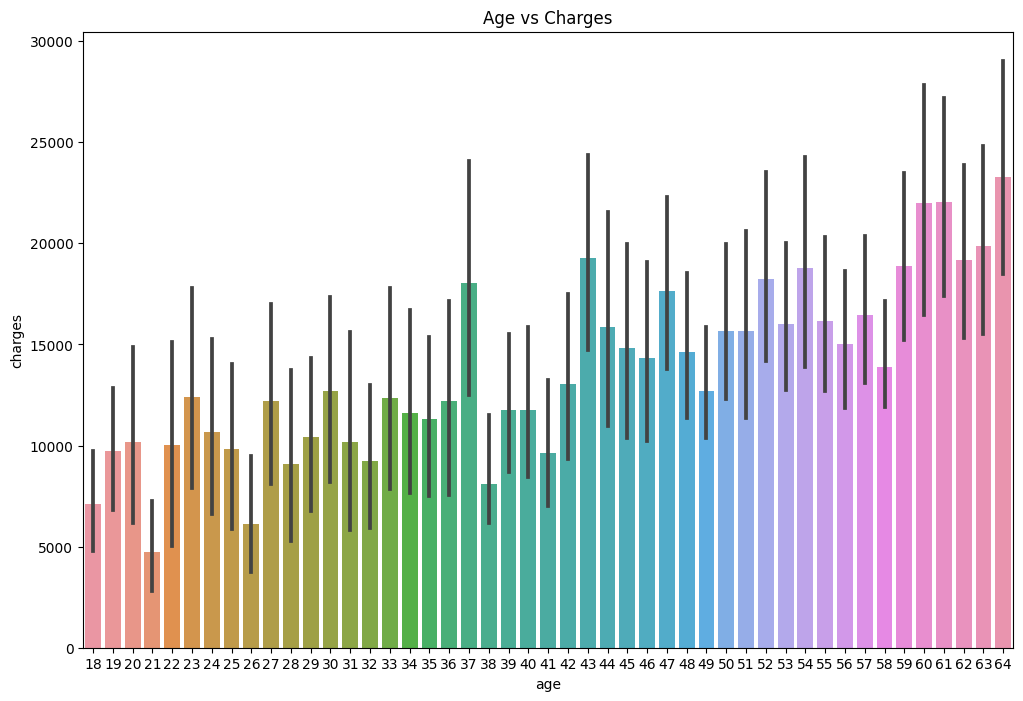

In [12]:
# Age vs Charges
# the more the age the more will be insurance charge
plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = insdata)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'Sex vs Charges')

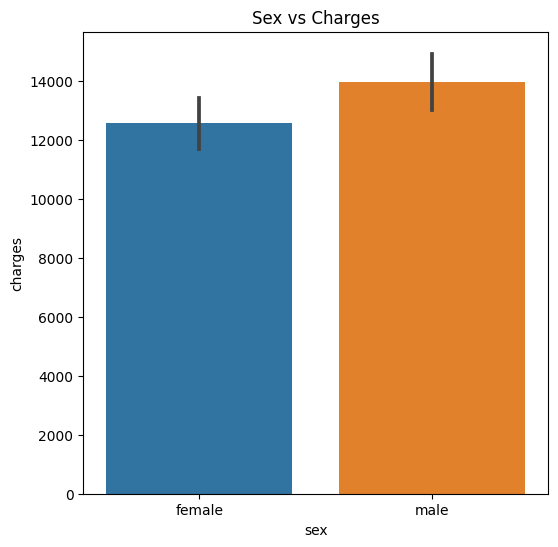

In [13]:
# sex vs charges
# males insurance charges more than females.
plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex',y = 'charges', data = insdata)

plt.title('Sex vs Charges')

Text(0.5, 1.0, 'Smoker vs Charges')

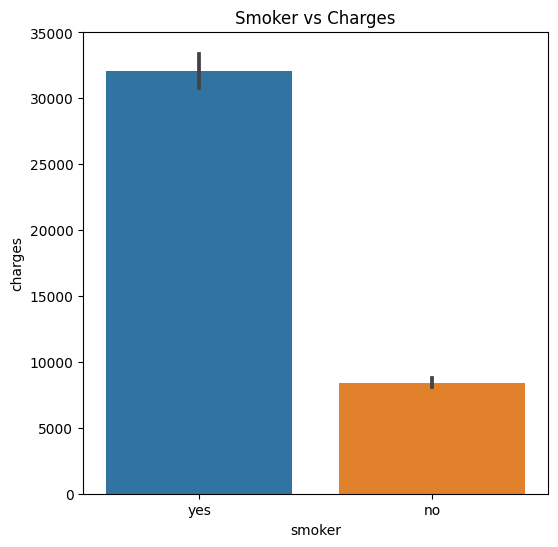

In [14]:
# smoker vs charges
# smokers have more insurance charges than the non smokers
plt.figure(figsize = (6, 6))
sns.barplot(x = 'smoker', y = 'charges', data = insdata)

plt.title('Smoker vs Charges')

Text(0.5, 1.0, 'Region vs Charges')

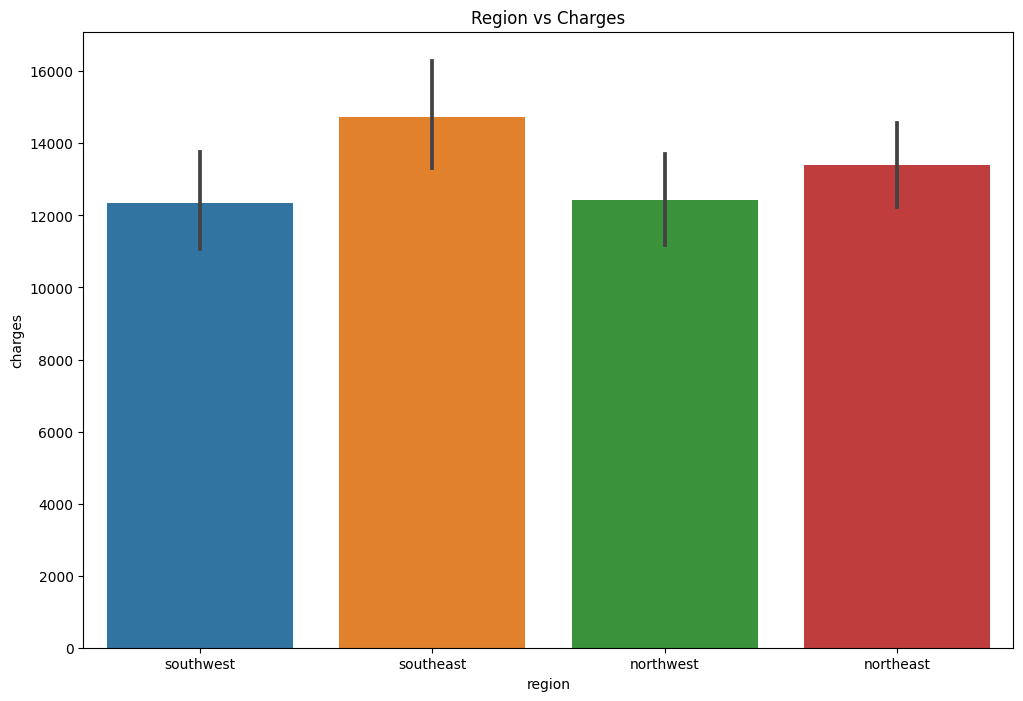

In [15]:
# region vs charges
# region actually does not play any role in determining the insurance charges
plt.figure(figsize = (12, 8))
sns.barplot(x = 'region', y = 'charges', data = insdata)

plt.title('Region vs Charges')

<ipython-input-16-ac8ca9b54a3e>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool),


<Axes: >

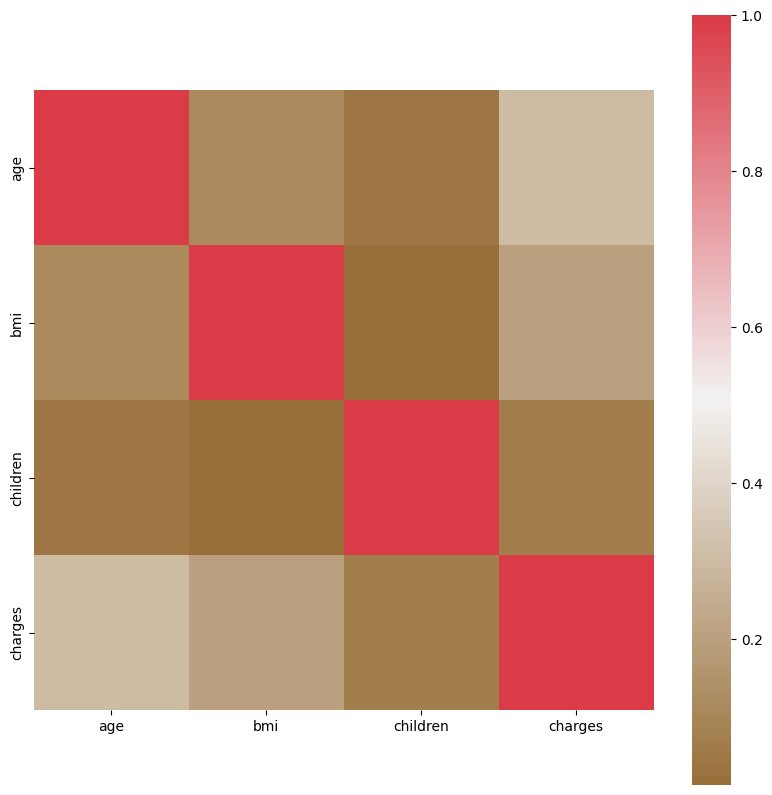

In [16]:
# plotting the correlation plot for the dataset
f, ax = plt.subplots(figsize = (10, 10))

corr = insdata.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool),
            cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax)

##STEP-3:Data Preprocessing / Clean the Data


In [17]:
# removing unnecassary columns from the dataset
insdata = insdata.drop('region', axis = 1)

print(insdata.shape)
insdata.columns

(1338, 6)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [18]:
# Label Encoding for sex and smoker

# importing label encoder
from sklearn.preprocessing import LabelEncoder

# creating a label encoder
le = LabelEncoder()

# label encoding for sex
# 0 for females and 1 for males
insdata['sex'] = le.fit_transform(insdata['sex'])

# label encoding for smoker
# 0 for smokers and 1 for non smokers
insdata['smoker'] = le.fit_transform(insdata['smoker'])


In [19]:
insdata['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [20]:
insdata['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [21]:
#Selecting Independent (Features) & Dependent(Target) variables
# x = insdata.iloc[:,:5]
# y = insdata.iloc[:,5]

X = insdata.drop(columns=['charges'])
y = insdata['charges']

In [22]:
print(X.shape)
X.sample(5)

(1338, 5)


,age,sex,bmi,children,smoker
57,18,1,31.680,2,1
827,36,1,28.025,1,1
1055,55,1,27.645,0,0
649,58,0,32.965,0,0
201,48,0,32.230,1,0


In [23]:
print(y.shape)
y.tail(5)

(1338,)


1333    10600.5483
1334     2205.9808
1335     1629.8335
1336     2007.9450
1337    29141.3603
Name: charges, dtype: float64

Splitting the dataset into the Training set and Test set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


##STEP-4 : Fit the Model & Predict , check the Accuracy

##Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

from math import sqrt

# creating the model
lrmodel = LinearRegression()

# feeding the training data to the model
lrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = lrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE)

# calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2: ', R2)

MSE:  35699244.58251515
RMSE:  5974.884482775809
R2:  0.760858175073853


##Support Vector Machine

In [27]:
from sklearn.svm import SVR

# creating the model
svrmodel = SVR()

# feeding the training data to the model
svrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = svrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2: ',R2)

MSE:  166561198.51123333
RMSE:  12905.859076839222
R2:  -0.11575887500351878


##Decision Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
dtrmodel = DecisionTreeRegressor()

# feeding the training data to the model
dtrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = dtrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2: ', R2)

MSE:  34780893.468560316
RMSE:  5897.532828951469
R2:  0.7670100184498801


##Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
# rfrmodel = RandomForestRegressor()
rfrmodel = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

# feeding the training data to the model
rfrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = rfrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2: ', R2)

MSE:  18848507.38044187
RMSE:  4341.486770732104
R2:  0.8737377637872905


Compare and evaluate the Model results and find the best model

In [ ]:
Random Forest Model score is best with R2 score as 0.87